#HEART DISEASE PREDICTION

# Import Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

#Load the Dataset

In [12]:
# Replace 'your_dataset.csv' with your actual dataset file path
data = pd.read_csv('/content/heart.csv')

# Display the first few rows of the dataset to verify loading
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Data Preprocessing

In [13]:
# Separate features (X) and target (Y)
X = data.drop(columns=['target'])
Y = data['target']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


#EDA

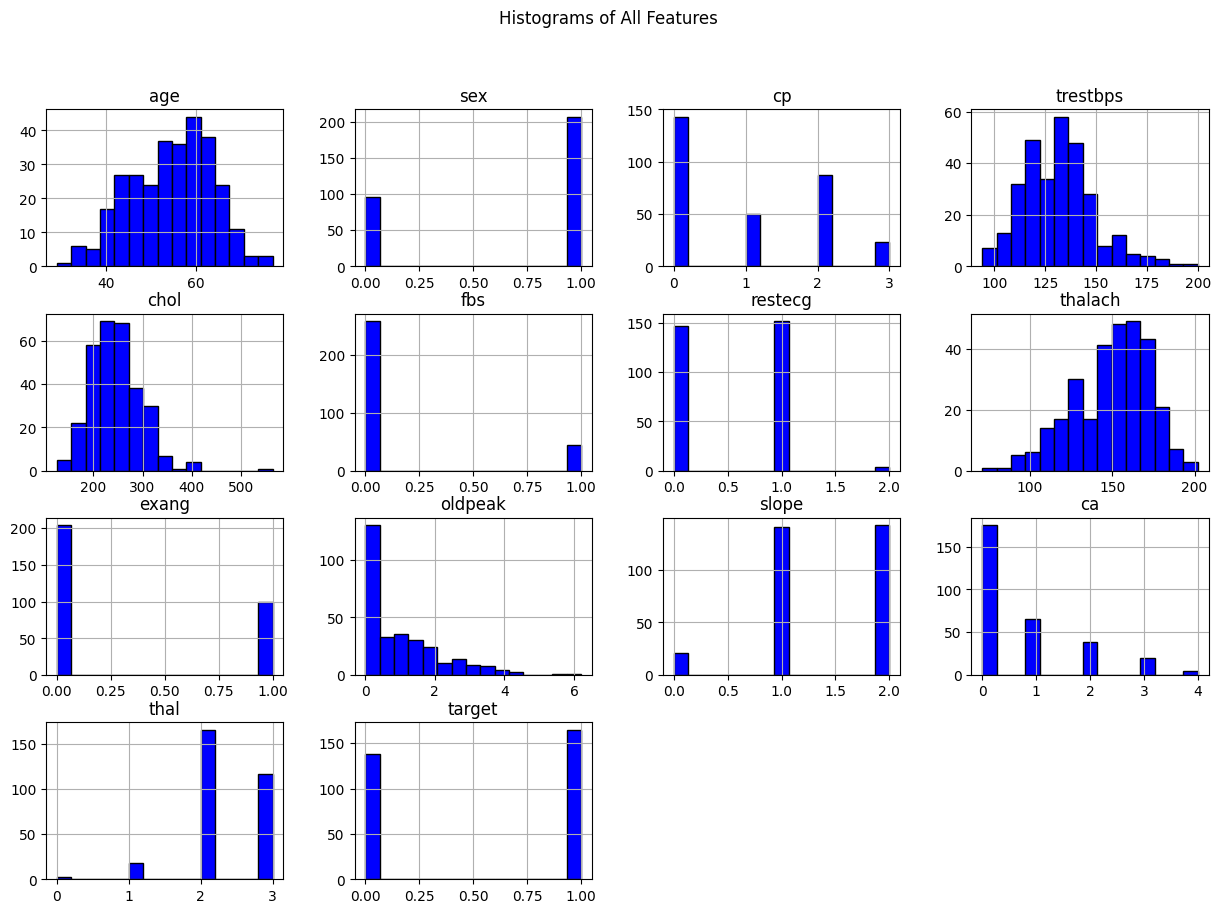

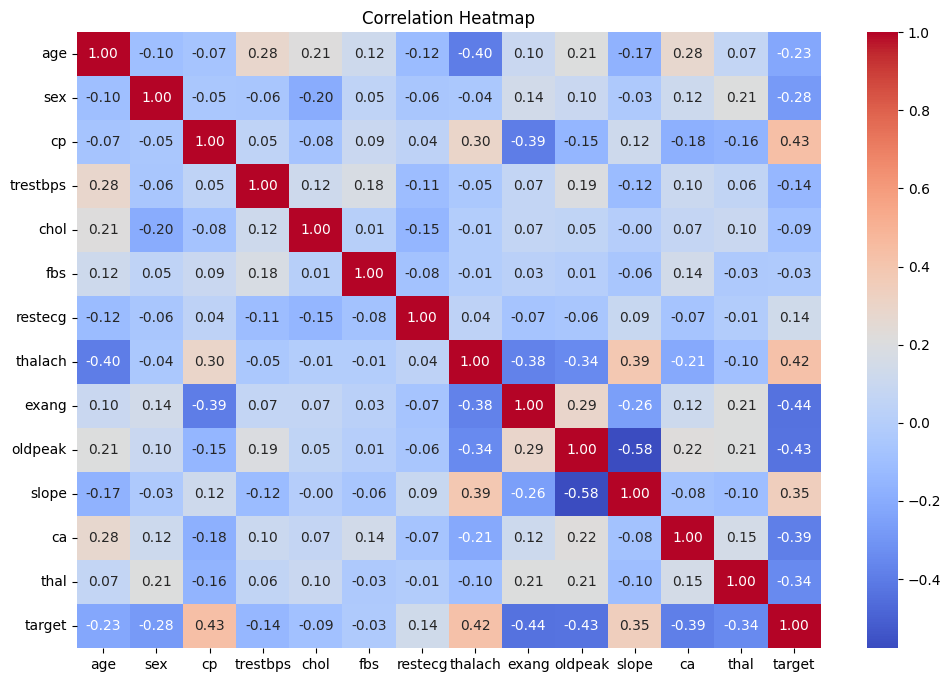

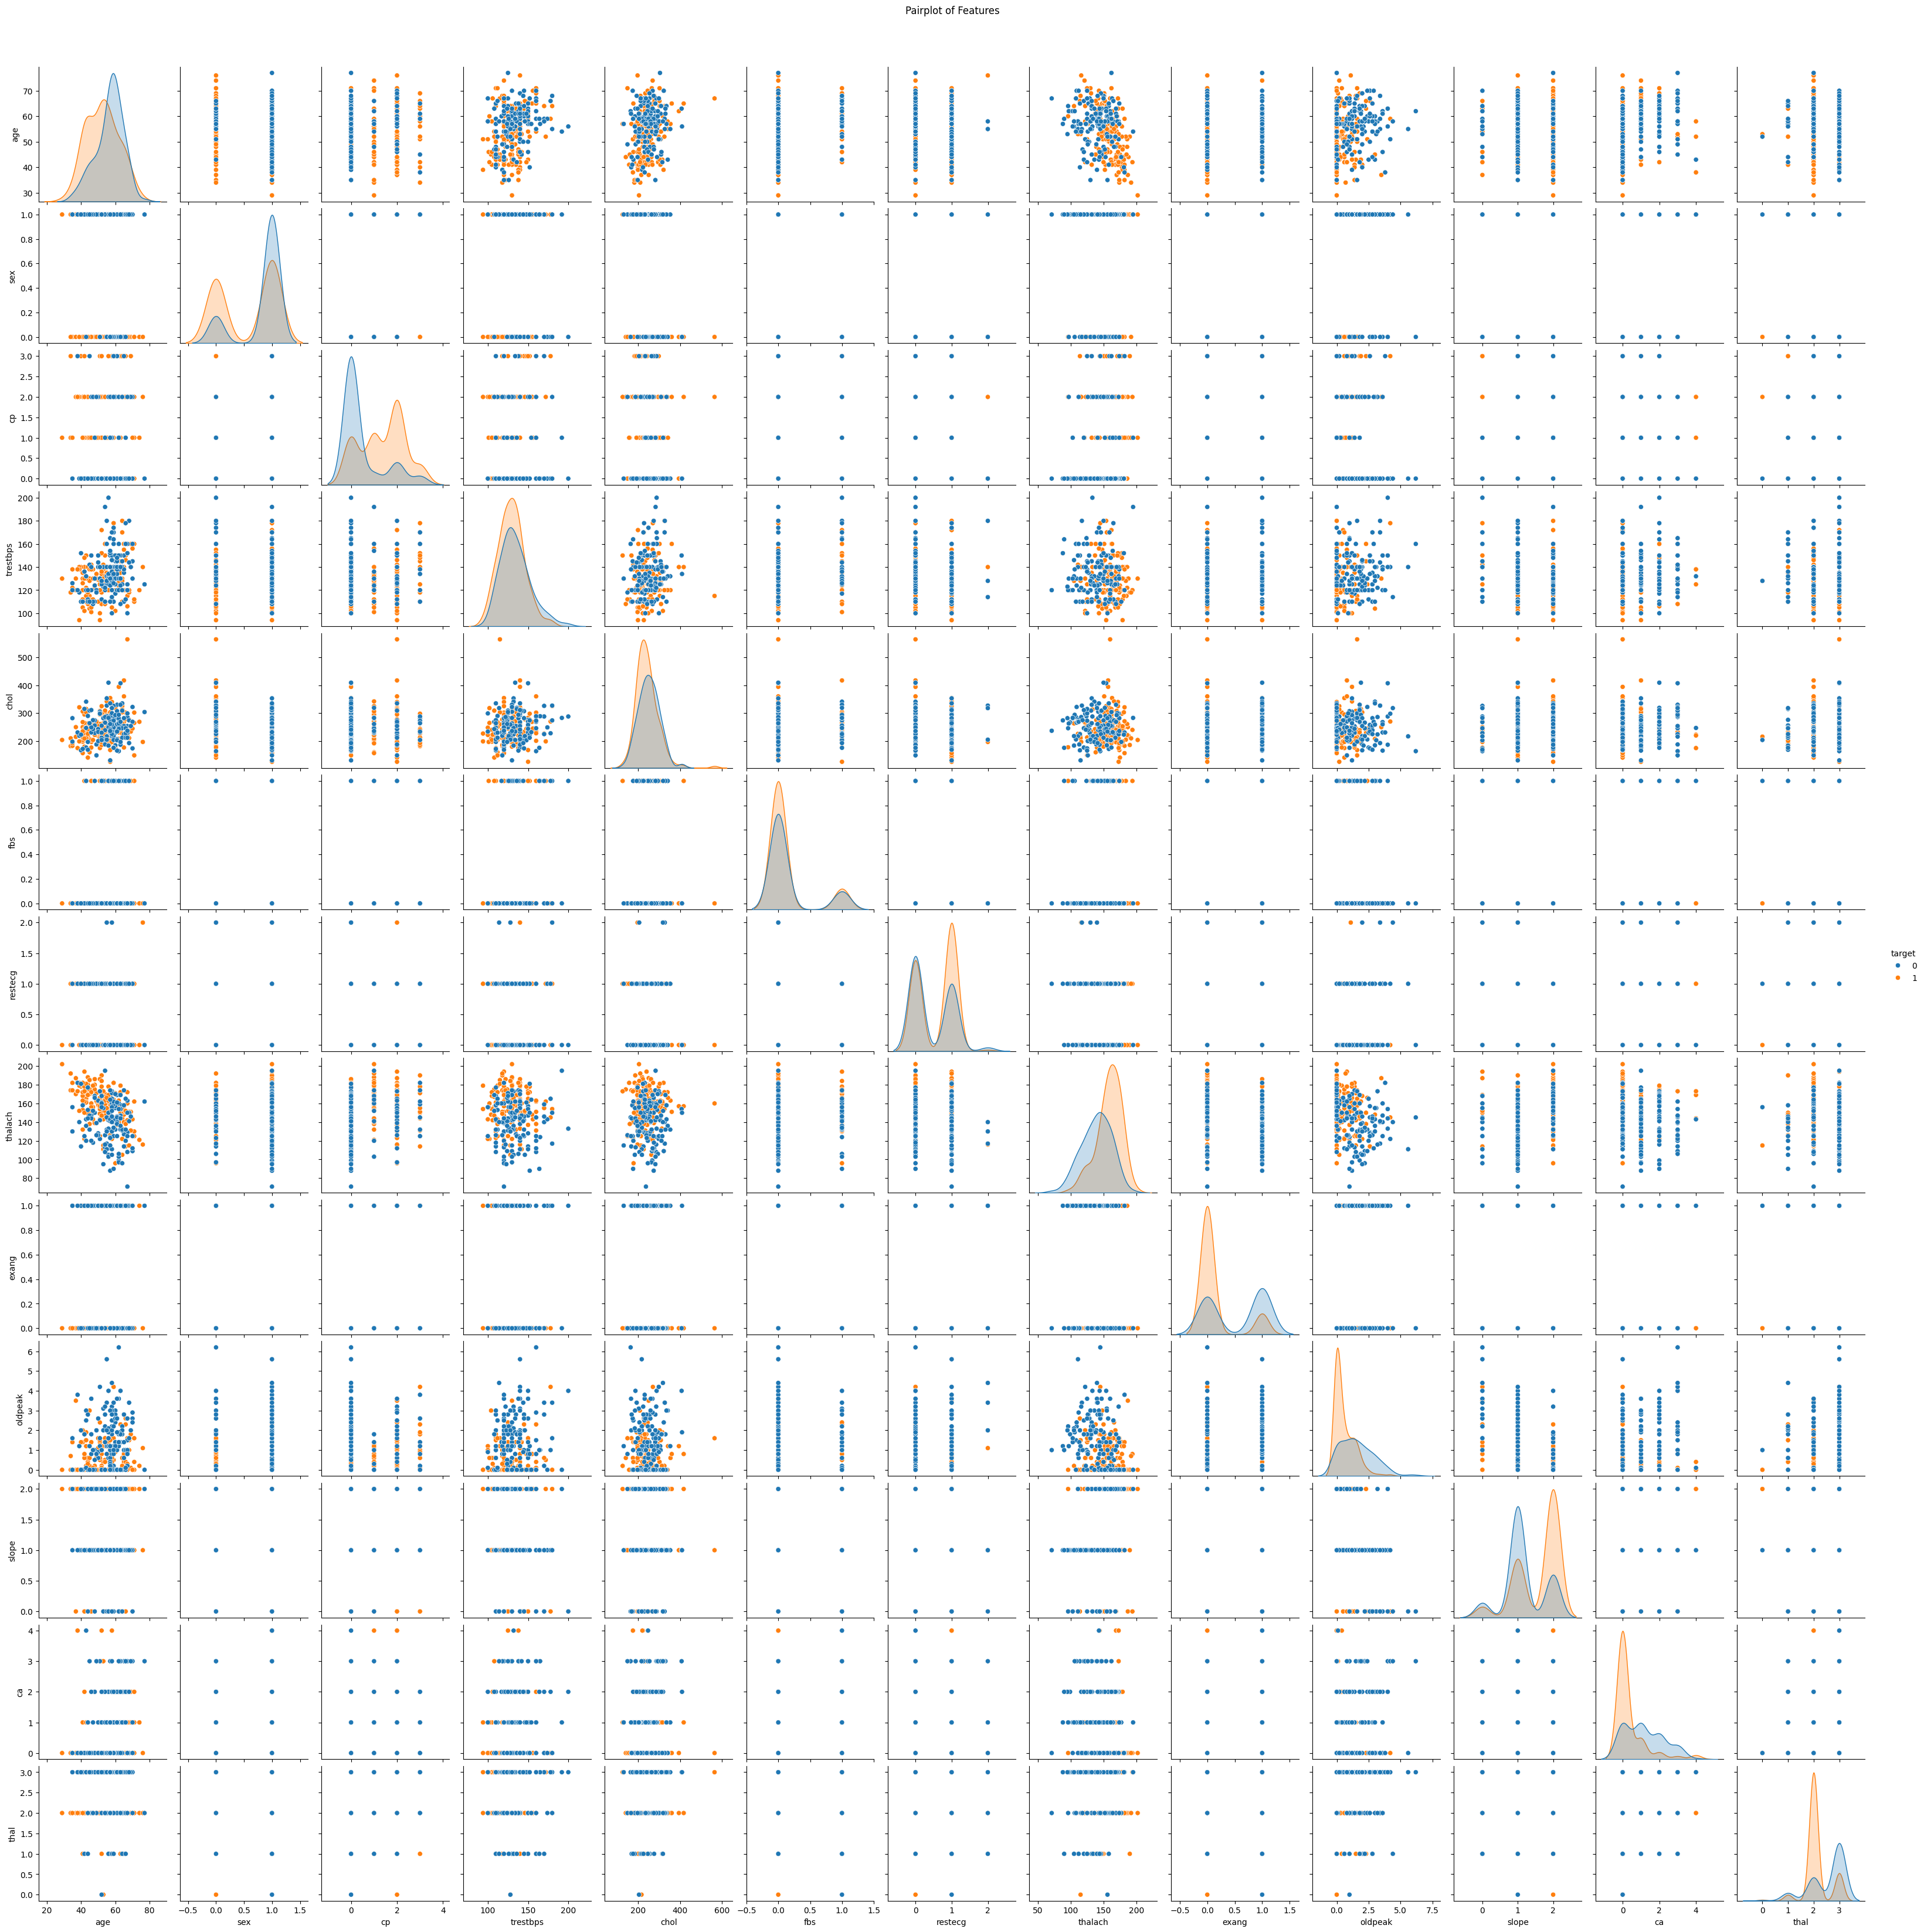

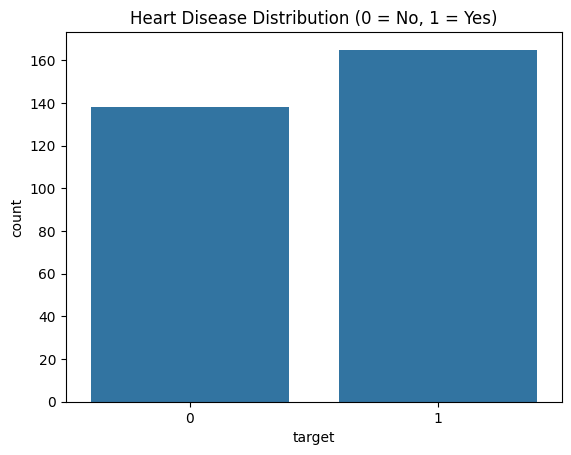

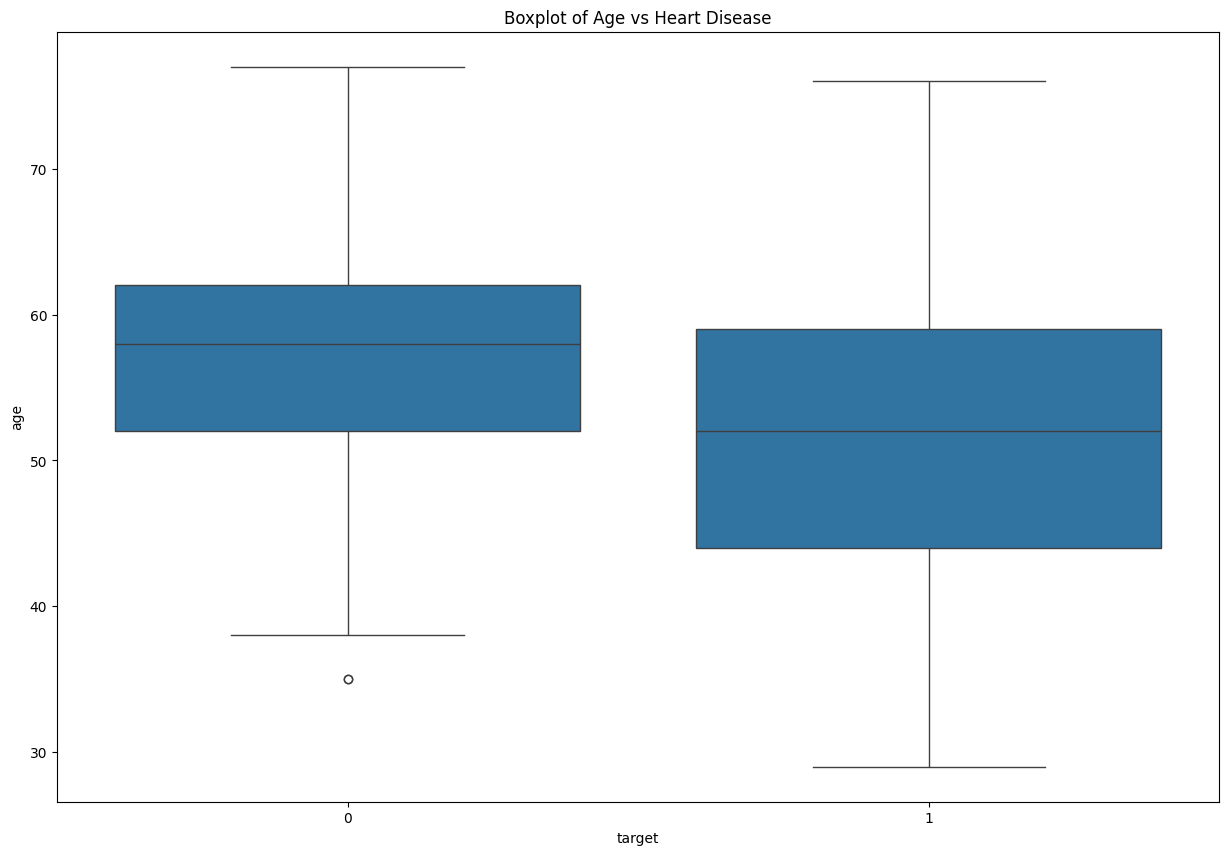

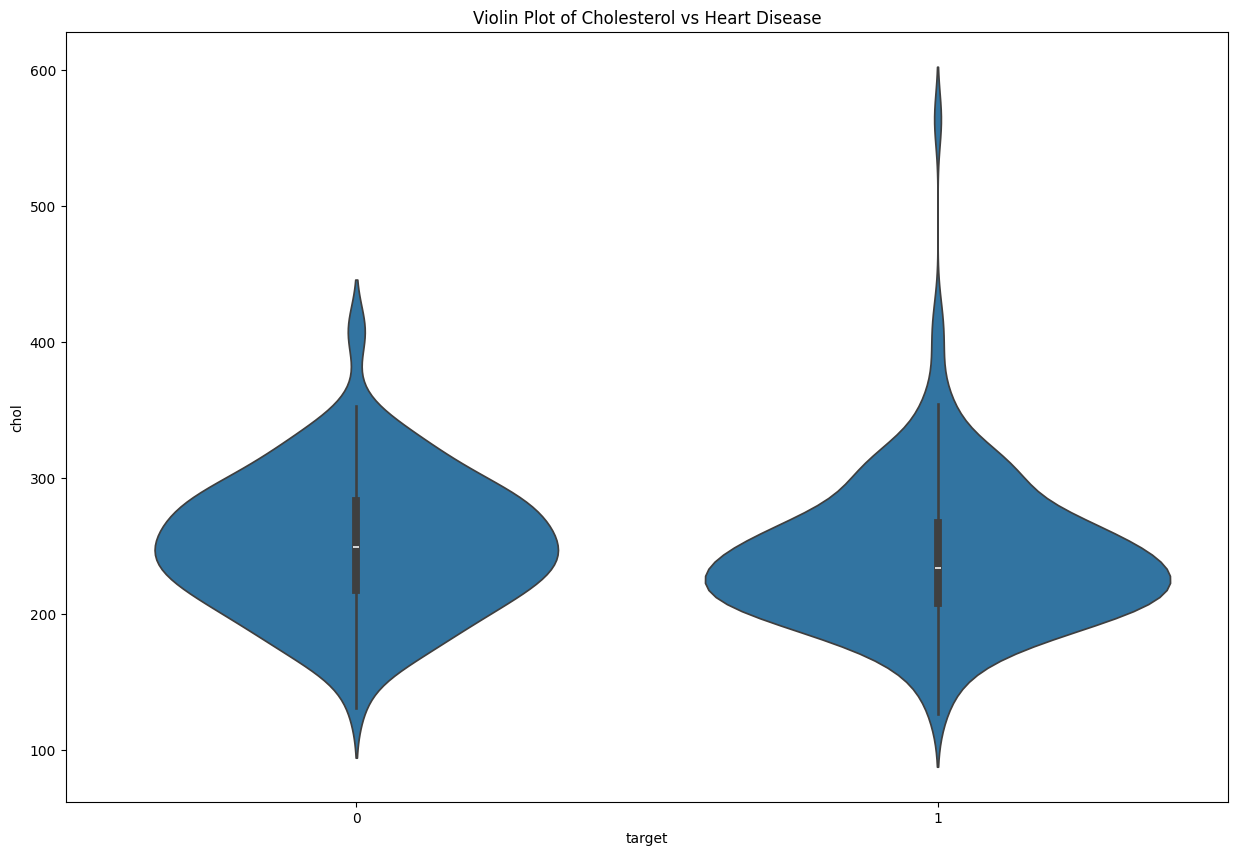

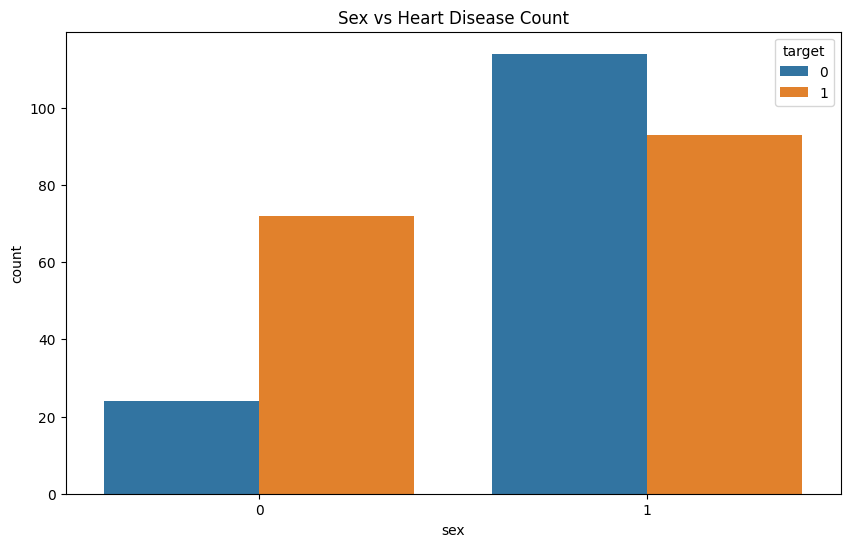

In [14]:
# 1. Plot histograms for all numerical features
data.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of All Features')
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Pairplot to see pairwise relationships in the dataset
sns.pairplot(data, hue='target')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# 4. Count plot of target distribution (Heart disease or no heart disease)
sns.countplot(x='target', data=data)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.show()

# 5. Boxplot to visualize the distribution of numerical features against the target
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='target', y='age')
plt.title("Boxplot of Age vs Heart Disease")
plt.show()

# 6. Violin plot for a detailed look at the distribution
plt.figure(figsize=(15, 10))
sns.violinplot(x='target', y='chol', data=data)
plt.title("Violin Plot of Cholesterol vs Heart Disease")
plt.show()

# 7. Count plot for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Sex vs Heart Disease Count')
plt.show()

#Split the Data into Training and Test Sets

In [15]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


#Train an SVM Model

In [16]:
# Initialize and train the SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)


SVC(kernel='linear')

#Make Predictions and Get Accuracy

In [17]:
# Predict on test data
Y_pred = clf.predict(X_test)

# Get accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Display classification report for detailed metrics
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Accuracy: 81.32%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Confusion Matrix:
 [[32  9]
 [ 8 42]]


#Prediction Function with User Input

In [18]:
def predict_heart_disease_user_input(model):
    # Collect user input for each feature
    input_data = []
    input_data.append(float(input("Age: ")))
    input_data.append(float(input("Sex (1 = Male, 0 = Female): ")))
    input_data.append(float(input("Chest Pain Type (0-3): ")))
    input_data.append(float(input("Resting Blood Pressure: ")))
    input_data.append(float(input("Serum Cholesterol (mg/dl): ")))
    input_data.append(float(input("Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False): ")))
    input_data.append(float(input("Resting Electrocardiographic Results (0-2): ")))
    input_data.append(float(input("Maximum Heart Rate Achieved: ")))
    input_data.append(float(input("Exercise Induced Angina (1 = Yes, 0 = No): ")))
    input_data.append(float(input("ST Depression Induced by Exercise Relative to Rest: ")))
    input_data.append(float(input("Slope of the Peak Exercise ST Segment (0-2): ")))
    input_data.append(float(input("Number of Major Vessels Colored by Fluoroscopy (0-3): ")))
    input_data.append(float(input("Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): ")))

    # Convert the input to a NumPy array and reshape it for the model
    input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

    # Normalize the input data using the same scaler used for training
    input_data_scaled = scaler.transform(input_data_as_numpy_array)

    # Make prediction
    prediction = model.predict(input_data_scaled)

    # Output the result
    if prediction[0] == 0:
        print("The Person does not have Heart Disease.")
    else:
        print("The Person has Heart Disease.")


#Interactive Input Form with Output

In [19]:
!pip install ipywidgets


In [20]:
# Create input boxes for each feature
age_input = widgets.FloatText(description="Age:")
sex_input = widgets.Dropdown(options=["Male", "Female"], description="Sex:")  # Keep strings for display
cp_input = widgets.IntSlider(min=0, max=3, description="Chest Pain (0-3):")
trestbps_input = widgets.FloatText(description="Resting BP:")
chol_input = widgets.FloatText(description="Cholesterol (mg/dl):")
fbs_input = widgets.Dropdown(options=["True", "False"], description="FBS > 120 mg/dl:")  # Keep strings for display
restecg_input = widgets.IntSlider(min=0, max=2, description="Rest ECG (0-2):")
thalach_input = widgets.FloatText(description="Max HR:")
exang_input = widgets.Dropdown(options=["Yes", "No"], description="Exercise Induced Angina:")  # Keep strings for display
oldpeak_input = widgets.FloatText(description="ST Depression:")
slope_input = widgets.IntSlider(min=0, max=2, description="Slope (0-2):")
ca_input = widgets.IntSlider(min=0, max=3, description="Vessels (0-3):")
thal_input = widgets.IntSlider(min=1, max=3, description="Thal (1-3):")

# Create an output widget for displaying results
output = widgets.Output()

# Function to handle prediction
def on_button_click(b):
    # Map categorical inputs from strings to numeric values
    sex_value = 1 if sex_input.value == "Male" else 0
    fbs_value = 1 if fbs_input.value == "True" else 0
    exang_value = 1 if exang_input.value == "Yes" else 0

    # Get input data from the input widgets, with categorical variables converted
    input_data = [
        age_input.value,
        sex_value,  # Numeric value for Sex
        cp_input.value,
        trestbps_input.value,
        chol_input.value,
        fbs_value,  # Numeric value for FBS
        restecg_input.value,
        thalach_input.value,
        exang_value,  # Numeric value for Exercise Angina
        oldpeak_input.value,
        slope_input.value,
        ca_input.value,
        thal_input.value
    ]

    # Convert input data to a DataFrame with proper feature names
    input_data_df = pd.DataFrame([input_data], columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

    # Normalize input data using the scaler (with feature names)
    input_data_scaled = scaler.transform(input_data_df)

    # Make prediction
    prediction = clf.predict(input_data_scaled)

    # Display the result
    with output:
        output.clear_output()
        if prediction[0] == 0:
            print("The Person does not have Heart Disease.")
        else:
            print("The Person has Heart Disease.")

# Create a button to submit the input
submit_button = widgets.Button(description="Predict")
submit_button.on_click(on_button_click)

# Display all widgets
display(age_input, sex_input, cp_input, trestbps_input, chol_input, fbs_input, restecg_input,
        thalach_input, exang_input, oldpeak_input, slope_input, ca_input, thal_input, submit_button, output)


FloatText(value=0.0, description='Age:')

Dropdown(description='Sex:', options=('Male', 'Female'), value='Male')

IntSlider(value=0, description='Chest Pain (0-3):', max=3)

FloatText(value=0.0, description='Resting BP:')

FloatText(value=0.0, description='Cholesterol (mg/dl):')

Dropdown(description='FBS > 120 mg/dl:', options=('True', 'False'), value='True')

IntSlider(value=0, description='Rest ECG (0-2):', max=2)

FloatText(value=0.0, description='Max HR:')

Dropdown(description='Exercise Induced Angina:', options=('Yes', 'No'), value='Yes')

FloatText(value=0.0, description='ST Depression:')

IntSlider(value=0, description='Slope (0-2):', max=2)

IntSlider(value=0, description='Vessels (0-3):', max=3)

IntSlider(value=1, description='Thal (1-3):', max=3, min=1)

Button(description='Predict', style=ButtonStyle())

Output()